In [300]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline

In [301]:
data = pd.read_csv('home_data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Готовим данные

In [302]:
cat_feat = list(data.dtypes[data.dtypes == object].index)
print(cat_feat)
num_feat = [f for f in data if f not in (cat_feat + ['Id', 'SalePrice'])]
print(num_feat)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclos

In [303]:
dummy = pd.get_dummies(data[cat_feat])
median = data[num_feat].median()
X = pd.concat([data[num_feat].fillna(median), dummy], axis=1)
Y = data['SalePrice']
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


Отделяем валидационную выборку 20%

In [304]:
splitter = int(len(X)*0.2)
X_train  = X[splitter:]
Y_train = Y[splitter:]
X_val = X[:splitter]
Y_val = Y[:splitter]
len(X_val)

292

Пробуем разные модели с использованием kFold, смотрим среднее

In [306]:
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression

In [307]:
lr = LinearRegression()

In [308]:
kfold = KFold(n_splits=10, random_state=555)

In [309]:
scores = cross_val_score(lr, X_train, Y_train, cv=kfold, n_jobs= -1)
mean = np.mean(scores)
print('Scores - ', scores)
print('Mean score - ', mean)

Scores -  [0.89278474 0.6967859  0.83911881 0.89087949 0.66891434 0.87846556
 0.8710441  0.9084712  0.10278362 0.92566349]
Mean score -  0.7674911251570495


In [310]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [311]:
y_pred = lr.predict(X_val)

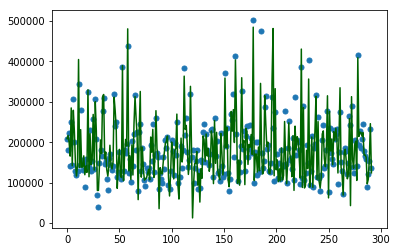

In [312]:
plt.plot(Y_val.index, Y_val, 'o', markersize = 5)
plt.plot(Y_val.index, y_pred, c='darkgreen')
plt.show()

In [313]:
from sklearn.tree import DecisionTreeRegressor

In [314]:
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, Y_train, cv=kfold, n_jobs= -1)
mean = np.mean(scores)
print('Scores - ', scores)
print('Mean score - ', mean)

Scores -  [0.75557623 0.65869247 0.77516069 0.84495274 0.76626358 0.64912697
 0.77819769 0.72548088 0.47030957 0.7718792 ]
Mean score -  0.7195640026957527


In [315]:
dt.fit(X_train,Y_train)
y_dt_pred = dt.predict(X_val)

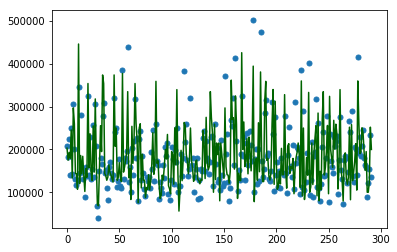

In [316]:
plt.plot(Y_val.index, Y_val, 'o', markersize = 5)
plt.plot(Y_val.index, y_dt_pred, c='darkgreen')
plt.show()

In [317]:
from sklearn.linear_model import Ridge

In [318]:
model = Ridge()
scores = cross_val_score(model, X_train, Y_train, cv=kfold, n_jobs= -1)
mean = np.mean(scores)
print('Scores - ', scores)
print('Mean score - ', mean)

Scores -  [0.89859807 0.73966096 0.84678543 0.87864924 0.85276286 0.85453362
 0.87486675 0.82488356 0.09007684 0.90040925]
Mean score -  0.7761226586948131


In [319]:
model.fit(X_train,Y_train)
y_log_pred = model.predict(X_val)

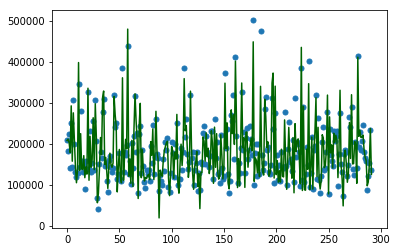

In [320]:
plt.plot(Y_val.index, Y_val, 'o', markersize = 5)
plt.plot(Y_val.index, y_log_pred, c='darkgreen')
plt.show()

Пробуем случайный лес

In [321]:
from sklearn.ensemble import RandomForestRegressor

In [322]:
rf = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
scores = cross_val_score(rf, X_train, Y_train, cv=kfold, n_jobs= -1)
mean = np.mean(scores)
print('Scores - ', scores)
print('Mean score - ', mean)

Scores -  [0.88210956 0.80943004 0.82260193 0.75980348 0.79003183 0.81408404
 0.82326452 0.71581107 0.70422712 0.85854376]
Mean score -  0.7979907340799193


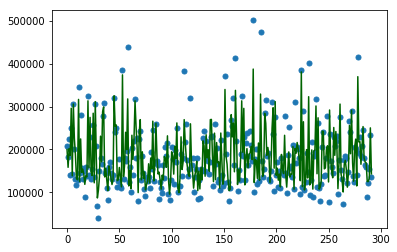

In [323]:
rf.fit(X_train,Y_train)
y_rf_pred = rf.predict(X_val)
plt.plot(Y_val.index, Y_val, 'o', markersize = 5)
plt.plot(Y_val.index, y_rf_pred, c='darkgreen')
plt.show()

In [324]:
imp = pd.Series(rf.feature_importances_)
imp_sort = imp.sort_values(ascending=False)[:10]
print('Важность признаков:')
for f in imp_sort.index:
    print(X_val.columns[f], '-', imp_sort[f] )

Важность признаков:
OverallQual - 0.4782583002833998
TotalBsmtSF - 0.1366841349567491
GrLivArea - 0.12284683874429474
GarageCars - 0.05938786784420014
ExterQual_TA - 0.05702253375319353
1stFlrSF - 0.03004755346548201
BsmtFinSF1 - 0.015884516982937975
GarageArea - 0.01362680438184305
MasVnrArea - 0.01257869813569915
ExterQual_Gd - 0.011759202798895524


Пробуем стэйкинг для трех моделей. Установил пакет mlxtend

In [332]:
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR


In [326]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
regressors = [model1,model2,model3]
meta_reg = LinearRegression()
st_reg = StackingRegressor(regressors=regressors,meta_regressor=meta_reg)

In [327]:
st_reg.fit(X_train,Y_train)
y_meta_pred = st_reg.predict(X_val)

In [328]:
print('Variance Score: %.4f' % st_reg.score(X_val, Y_val))

Variance Score: 0.7031


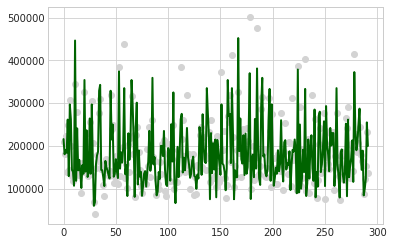

In [329]:
with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(Y_val.index, Y_val, c='lightgray')
    plt.plot(Y_val.index, y_meta_pred, c='darkgreen', lw=2)

plt.show()

На этих моделях нет улучшений. Пробуем другие

In [330]:
model1 = LinearRegression()
model2 = SVR(kernel='linear')
model3 = Ridge(random_state=1)
regressors = [model1,model2,model3]
meta_reg = LinearRegression()
st_reg = StackingRegressor(regressors=regressors,meta_regressor=meta_reg)
st_reg.fit(X_train,Y_train)
y_meta_pred = st_reg.predict(X_val)
print('Variance Score: %.4f' % st_reg.score(X_val, Y_val))

Variance Score: 0.8230


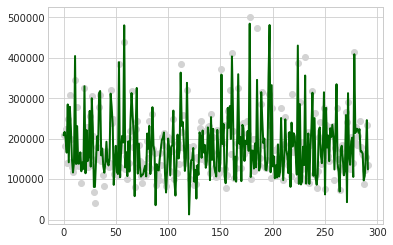

In [331]:
with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(Y_val.index, Y_val, c='lightgray')
    plt.plot(Y_val.index, y_meta_pred, c='darkgreen', lw=2)

plt.show()